# Property Price Predication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# 15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize'] = [15,8]

# set_options

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns=None
# display all rows of the dataframe
pd.options.display.max_rows=None

# use below code to convert the "exponential " values to float
np.set_printoptions(suppress=True)

# read_Data

In [4]:
df=pd.read_csv("HousePrices.csv",index_col=0)
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Dimensions of the data

In [5]:
df.shape

(2073, 80)

# data Analysis and preparation

In [6]:
df.dtypes

Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExposure            object
BsmtFinT

In [7]:
# lets checks 
print(df['Dwell_Type'].dtypes)
print(df['OverallQual'].dtypes)
print(df['OverallCond'].dtypes)

int64
int64
int64


# statistics Summary

In [8]:
df.describe()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### for getting the sataistical summary of categorical features we use the describle(include=object)

In [9]:
# summary of categorical variable
df.describe(include=object)

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


In [10]:
df["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [11]:
df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [12]:
# use drope() to drop the redunat varibles
# "axis" =1 drops the corresponding columns
df=df.drop(["PoolQC","PoolArea"],axis=1)

In [13]:
df.shape

(2073, 78)

# Distribution of Variables

we plot the histogram to check the distribution of the variables 

In [14]:
df_numerical= df.select_dtypes(include=np.number)

In [15]:
df_numerical.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [16]:
# plot the histogram of numeric variables
# hist() by default considers the numeric variables only, 
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'

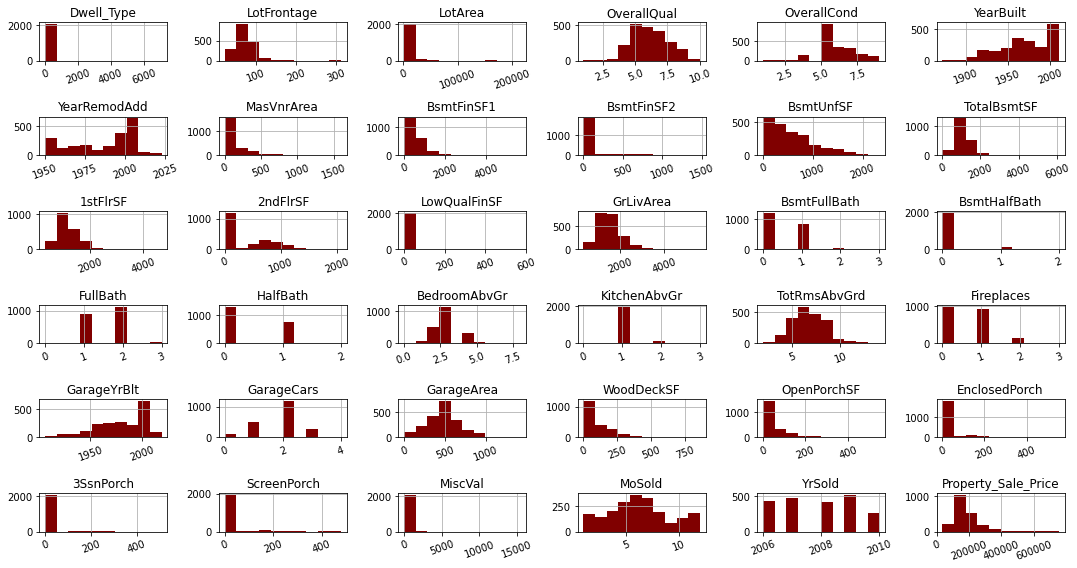

In [17]:
df.hist(xrot=20,color="maroon")
# adjust the subplots
plt.tight_layout()
plt.show()

## visualizeing  the target variable

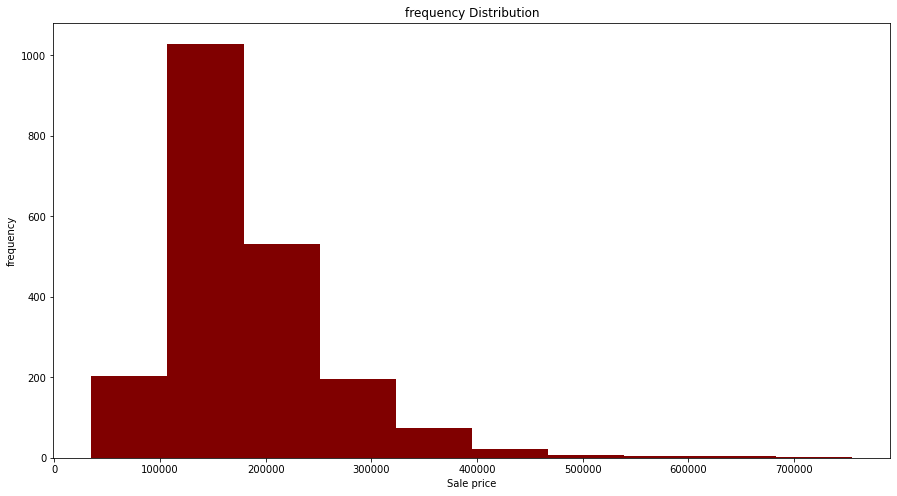

In [18]:
plt.hist(df["Property_Sale_Price"],color="maroon")
plt.xlabel("Sale price")
plt.ylabel("frequency")
plt.title("frequency Distribution")
plt.show()

the above plot shows that the target variable is right skewed

### distribution of categroical variables

for the categoric variables we plot the countplot

In [19]:
# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype




In [20]:
categorical=[]
for columns in df:
    if is_string_dtype(df[columns]):
        categorical.append(columns)
        

In [21]:
print(categorical)

['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


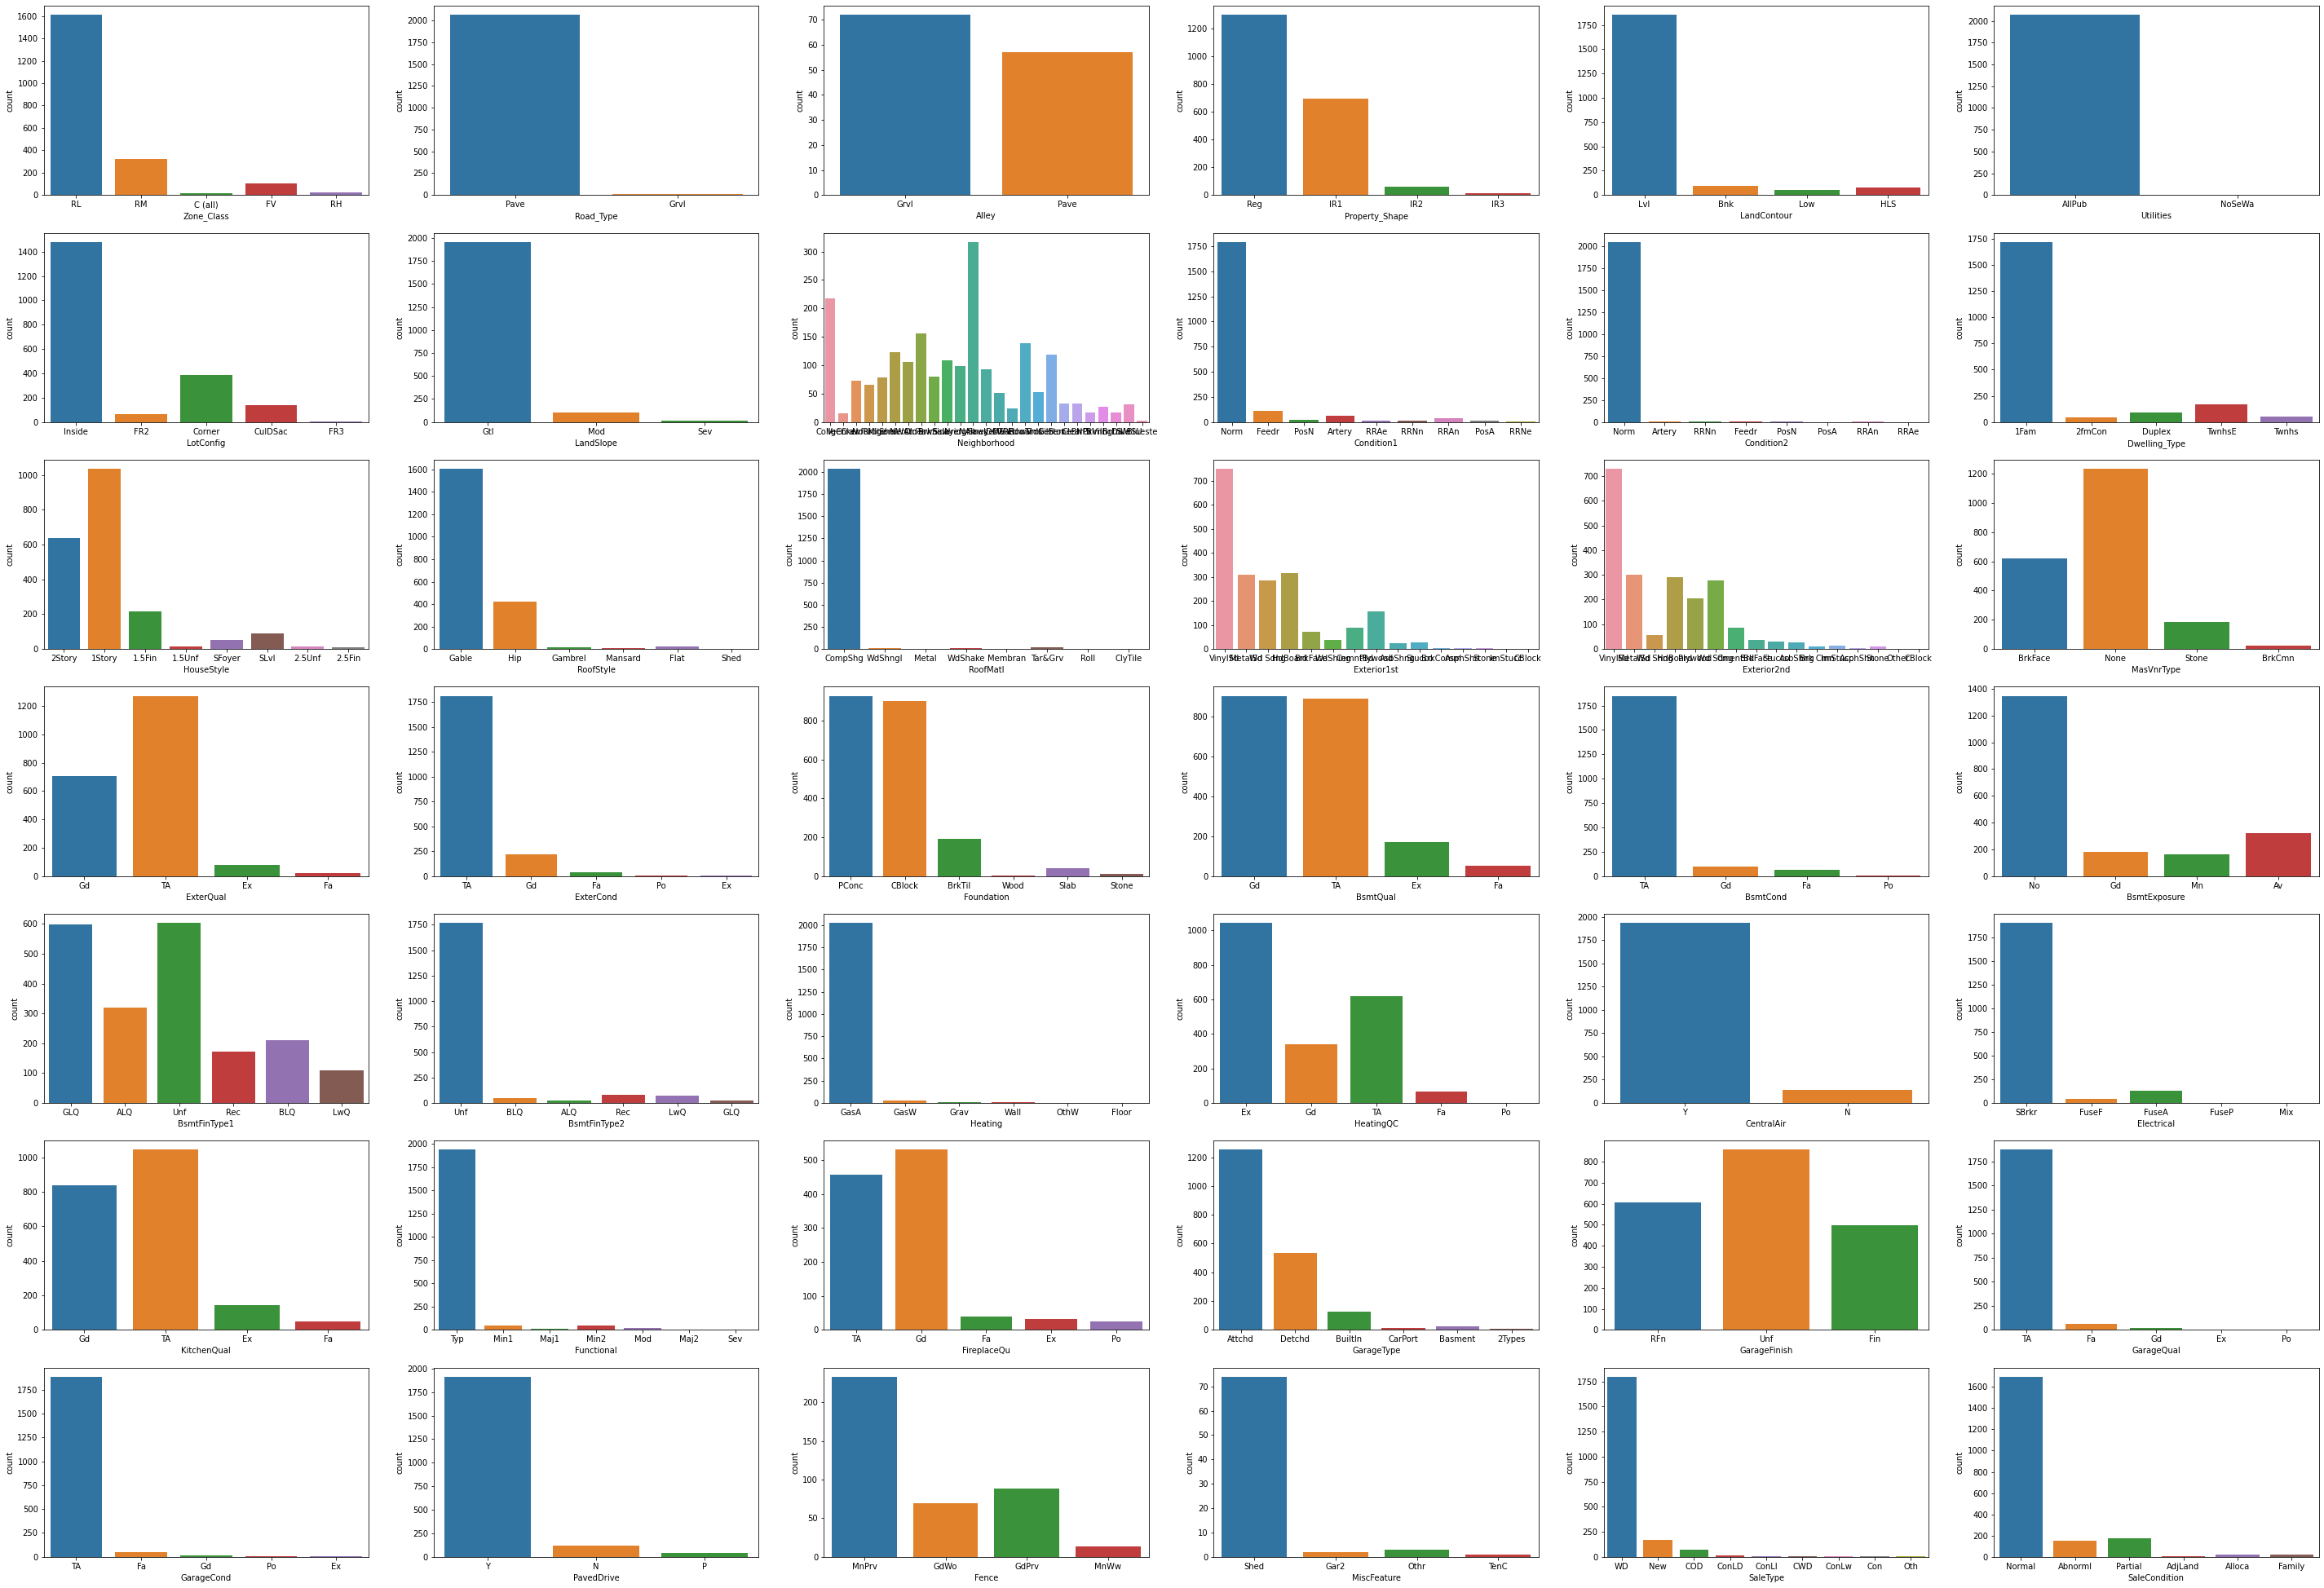

In [22]:
# plot the count plot for each categorical variable 
# 'figsize' sets the figure size

fig,ax=plt.subplots(nrows=7,ncols=6,figsize=(50,35))
# plot the count plot using countplot() for each categrorical variable
for variable, subplot in zip(categorical,ax.flatten()):
    sns.countplot(df[variable],ax=subplot)

# display the plot 
plt.show()


### boxplot of QverallQulity and Property_sale_price

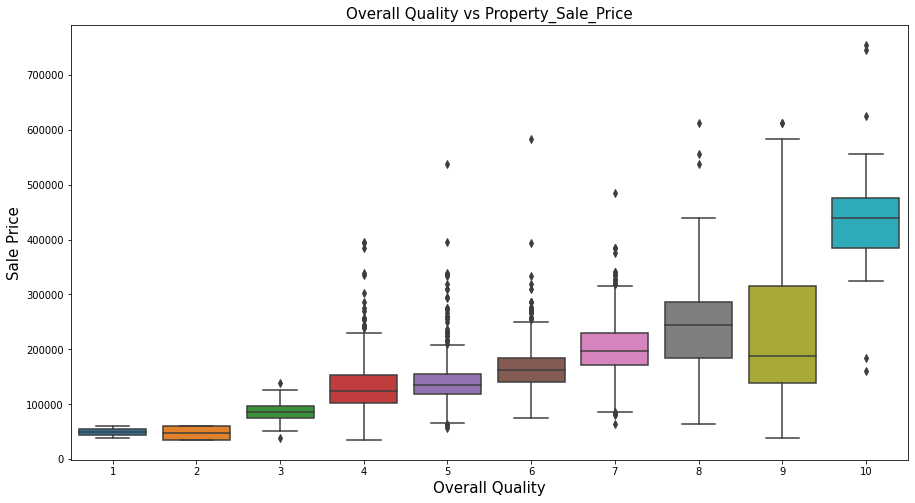

In [23]:
sns.boxplot(data=df,y="Property_Sale_Price", x="OverallQual")
plt.title("Overall Quality vs Property_Sale_Price", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Quality", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

### boxplot of overall condition and Property_sale_price

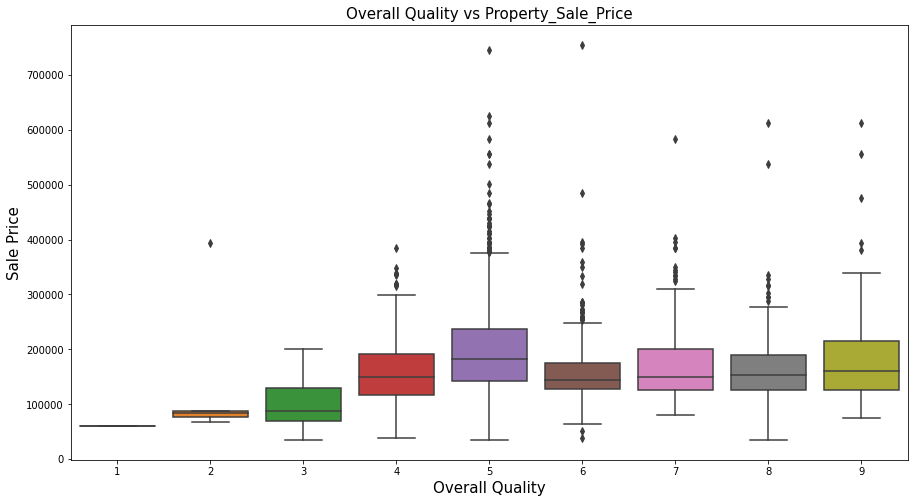

In [24]:
sns.boxplot(data=df,y="Property_Sale_Price", x="OverallCond")
plt.title("Overall Quality vs Property_Sale_Price", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Quality", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

# Outliers Discovery

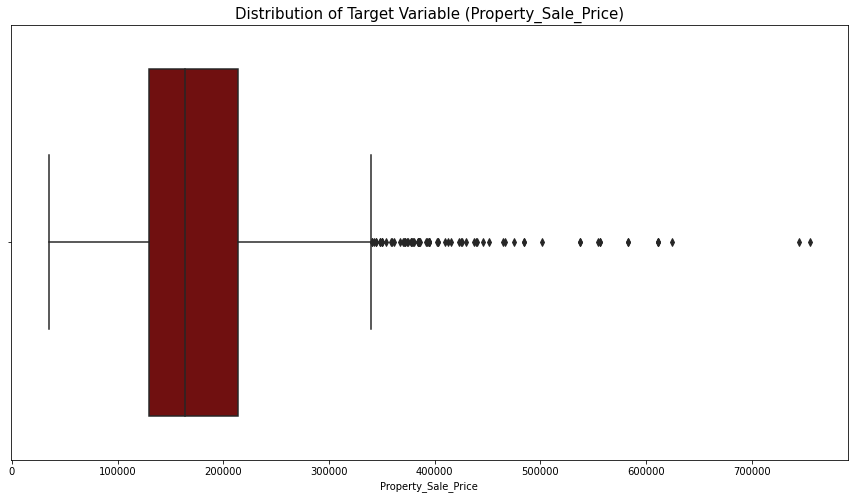

In [25]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['Property_Sale_Price'], color='maroon')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)

# display the plot
plt.show()

From the above plot we can see that there are outliers present in the target variable 'Property_Sale_Price'. Outliers badly affect the prediction of the regression model and thus, we will remove these outliers

In [26]:
# remove the obervation with the house price greater than or equal to 500000
df=df[df["Property_Sale_Price"]<500000]
# check the dimension of the data
df.shape

(2059, 78)

## Missing values 

If we do not handle the missing values properly then we may end up drawing an inaccurate inference about the data.

In [27]:
Null=df.isnull().sum().sort_values(ascending=False)# 'ascending = False': sorts values in the descending order

In [28]:
Null

MiscFeature            1979
Alley                  1930
Fence                  1656
FireplaceQu             988
LotFrontage             320
GarageType              113
GarageFinish            113
GarageQual              113
GarageCond              113
GarageYrBlt             113
BsmtExposure             61
BsmtFinType2             60
BsmtCond                 59
BsmtFinType1             59
BsmtQual                 59
MasVnrArea               14
MasVnrType               14
Electrical                1
HalfBath                  0
BsmtFullBath              0
BsmtHalfBath              0
BedroomAbvGr              0
FullBath                  0
TotRmsAbvGrd              0
Functional                0
KitchenAbvGr              0
KitchenQual               0
Dwell_Type                0
Fireplaces                0
LowQualFinSF              0
GarageCars                0
GarageArea                0
PavedDrive                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch       

In [29]:
Percentage_null= (df.isnull().sum()*100/df.isnull().count())
Percentage_null=Percentage_null.sort_values(ascending=False)
Percentage_null

MiscFeature            96.114619
Alley                  93.734823
Fence                  80.427392
FireplaceQu            47.984458
LotFrontage            15.541525
GarageType              5.488101
GarageFinish            5.488101
GarageQual              5.488101
GarageCond              5.488101
GarageYrBlt             5.488101
BsmtExposure            2.962603
BsmtFinType2            2.914036
BsmtCond                2.865469
BsmtFinType1            2.865469
BsmtQual                2.865469
MasVnrArea              0.679942
MasVnrType              0.679942
Electrical              0.048567
HalfBath                0.000000
BsmtFullBath            0.000000
BsmtHalfBath            0.000000
BedroomAbvGr            0.000000
FullBath                0.000000
TotRmsAbvGrd            0.000000
Functional              0.000000
KitchenAbvGr            0.000000
KitchenQual             0.000000
Dwell_Type              0.000000
Fireplaces              0.000000
LowQualFinSF            0.000000
GarageCars

In [30]:
# concant the null and percentage null
missing_value=pd.concat([Null,Percentage_null],axis=1,keys=["total_Null","Percentage of Missing Value"])

In [31]:
 #add the column containing data type of each variable
missing_value['Data Type'] = df[missing_value.index].dtypes
missing_value

,total_Null,Percentage of Missing Value,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
GarageYrBlt,113,5.488101,float64


we can see that 18 variable contain the missing values 

For the numerical variables, we can replace the missing values by their mean, median or mode as per the requirement.

<AxesSubplot:xlabel='LotFrontage'>

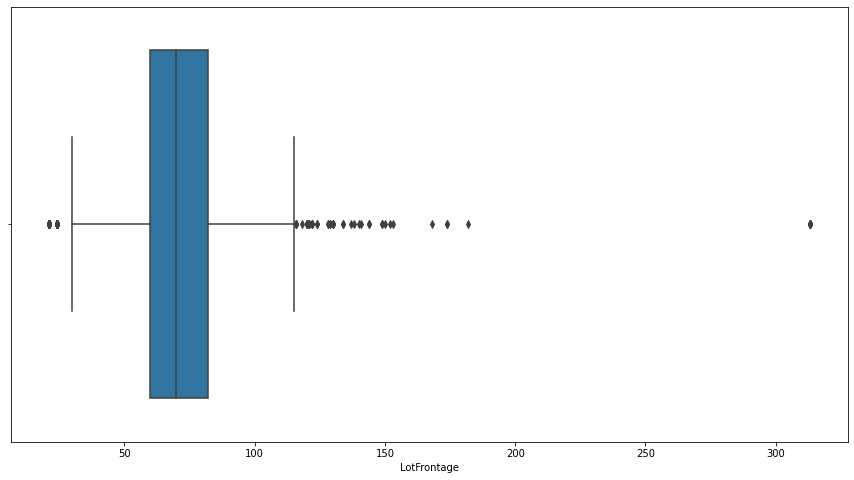

In [32]:
sns.boxplot(data=df,x='LotFrontage')

The variable 'LotFrontage' is right skewed and thus we will fill the missing values with its median value

In [33]:
# use the function fillna() to fill the missing values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

We will replace the missing values in the numeric variable GarageYrBlt by 0. The missing values in this variable indicates that there are 81 observations for which garage facility is not available

In [34]:
# use the function fillna() to replace missing values in 'GarageYrBlt' with 0 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

The variable 'MasVnrArea' is positively skewed and thus we will fill the missing values with its median value

In [35]:
# use the function fillna() to fill the missing values
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

#### Handle the missing values for categorical variables

In [36]:
cat = [feature  for feature in df.columns if df[feature].dtypes=="O"]

In [37]:
cat

['Zone_Class',
 'Road_Type',
 'Alley',
 'Property_Shape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [38]:
df[cat].isnull().sum().sort_values(ascending=False)

MiscFeature       1979
Alley             1930
Fence             1656
FireplaceQu        988
GarageQual         113
GarageType         113
GarageFinish       113
GarageCond         113
BsmtExposure        61
BsmtFinType2        60
BsmtCond            59
BsmtFinType1        59
BsmtQual            59
MasVnrType          14
Electrical           1
PavedDrive           0
SaleType             0
Functional           0
KitchenQual          0
CentralAir           0
HeatingQC            0
Heating              0
Zone_Class           0
Road_Type            0
Condition2           0
Property_Shape       0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Dwelling_Type        0
Foundation           0
HouseStyle           0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
ExterQual            0
ExterCond            0
SaleCondition        0
dtype: int64

In [39]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'MiscFeature' with a valid value, 'None'
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# replace NA values in 'Alley' with a valid value, 'No alley access' 
df['Alley'] = df['Alley'].fillna('No alley access')

# replace NA values in 'Fence' with a valid value, 'No Fence'
df['Fence'] = df['Fence'].fillna('No Fence')

# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [40]:
# replace the missing values in the categoric variables representing the garage by `No Garage`
for col in ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']:
    df[col].fillna('No Garage', inplace = True)

In [41]:
# according to the data definition, 'NA' denotes the absence of basement in the variabels 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'
# replace the missing values in the categoric variables representing the basement by `No Basement`
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df[col].fillna('No Basement', inplace = True)


In [42]:
# according to the data definition, 'NA' denotes the absence of masonry veneer
# replace the missing values in the categorical variable 'MasVnrType' with a value, 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [43]:
# replace the missing values in the categorical variable 'Electrical' with its mode
mode_electrical = df['Electrical'].mode()
df['Electrical'].fillna(mode_electrical[0] , inplace = True)

In [44]:
df.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Alley                  0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0


<AxesSubplot:ylabel='Id'>

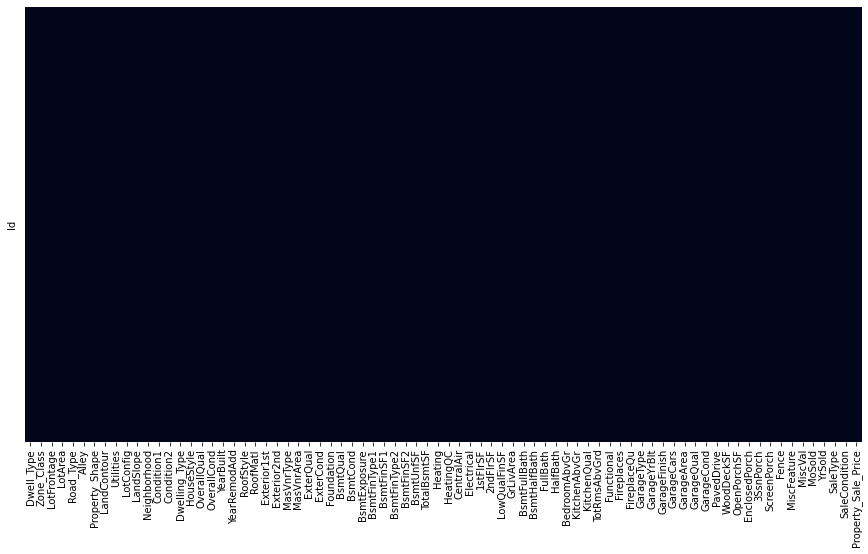

In [45]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

# study correlation

to check the correlation between numerical variable , compute a correelation 
matrix and plot a heatmap for the correlation matrix

In [46]:
# use the corr() function to generate the correlation matrix of the numerical variable

corr= df.corr()
# print the correlation matrix
corr 

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.074800,-0.033615,0.047964,0.033443,0.028130,0.043696,-0.002968,-0.032657,-0.025551,-0.022816,-0.068175,-0.078199,0.102602,0.004907,0.031516,-0.015669,-0.004682,0.058215,0.066807,-0.006166,0.074714,0.021491,-0.030706,-0.016988,-0.000153,-0.012796,0.004233,0.002366,-0.006756,-0.012038,-0.011941,-0.004000,-0.021211,0.019807,-0.015847
LotFrontage,-0.074800,1.000000,0.238191,0.091085,-0.010321,0.081517,0.092211,0.111412,0.118122,0.055937,0.105129,0.256237,0.318458,0.054620,0.024525,0.284689,0.078472,-0.036578,0.153532,0.036507,0.207026,0.009171,0.264457,0.193244,0.081887,0.216162,0.248652,0.073232,0.092217,0.000492,0.037425,0.018689,-0.003469,0.028949,0.024222,0.259284
LotArea,-0.033615,0.238191,1.000000,0.068639,0.016214,-0.017109,0.013312,0.041665,0.157255,0.077684,-0.000161,0.193753,0.239459,0.023070,-0.000437,0.196624,0.123539,0.031117,0.085524,-0.002532,0.103089,-0.007048,0.143813,0.208337,0.064729,0.120713,0.137110,0.112262,0.063370,-0.021205,0.011367,0.027271,0.031767,0.000059,-0.008380,0.201837
OverallQual,0.047964,0.091085,0.068639,1.000000,-0.009016,0.327610,0.375994,0.262933,0.144357,-0.059759,0.197537,0.336071,0.289443,0.202063,-0.012228,0.387148,0.080498,-0.050754,0.373134,0.184192,0.057712,-0.110530,0.256431,0.243910,0.207714,0.390077,0.363906,0.153993,0.214397,-0.077420,0.001634,0.017440,-0.033615,0.040923,-0.022845,0.525023
OverallCond,0.033443,-0.010321,0.016214,-0.009016,1.000000,-0.247321,0.082495,-0.091154,-0.040397,0.028754,-0.101118,-0.137946,-0.095167,0.014392,-0.009673,-0.058744,-0.029696,0.048987,-0.121618,-0.044774,-0.011096,-0.019089,-0.041908,-0.034714,-0.005845,-0.118467,-0.088832,0.013183,-0.043525,0.045406,0.017653,0.011409,0.042210,-0.023371,0.033040,-0.066617
YearBuilt,0.028130,0.081517,-0.017109,0.327610,-0.247321,1.000000,0.534846,0.258605,0.200397,-0.027750,0.117984,0.322489,0.225896,0.011759,-0.180594,0.158950,0.139671,-0.018345,0.398912,0.191748,-0.057029,-0.143052,0.069192,0.127941,0.219338,0.453642,0.404166,0.182813,0.178019,-0.321816,0.034844,-0.050894,-0.038275,0.031601,-0.007701,0.456523
YearRemodAdd,0.043696,0.092211,0.013312,0.375994,0.082495,0.534846,1.000000,0.153766,0.092169,-0.074160,0.197311,0.275945,0.214706,0.133300,-0.084622,0.265337,0.099852,-0.011554,0.419381,0.176598,-0.038715,-0.127357,0.161845,0.099378,0.111173,0.387912,0.329864,0.182945,0.218917,-0.176180,0.040749,-0.044323,-0.011217,0.038320,0.055504,0.497005
MasVnrArea,-0.002968,0.111412,0.041665,0.262933,-0.091154,0.258605,0.153766,1.000000,0.203449,-0.077174,0.128413,0.317306,0.289921,0.175364,-0.071076,0.358569,0.065543,0.020719,0.257621,0.192465,0.103158,-0.052282,0.244016,0.263473,0.131745,0.340641,0.342405,0.113509,0.136036,-0.094168,0.033596,0.054797,-0.034648,-0.006236,0.011242,0.438844
BsmtFinSF1,-0.032657,0.118122,0.157255,0.144357,-0.040397,0.200397,0.092169,0.203449,1.000000,-0.063139,-0.514643,0.468375,0.377574,-0.144388,-0.071639,0.146652,0.641491,0.080676,0.022725,0.003940,-0.129599,-0.089633,-0.022325,0.202566,0.093347,0.179226,0.244935,0.208102,0.108858,-0.086769,0.047758,0.042606,-0.000288,-0.011921,0.019093,0.342365
BsmtFinSF2,-0.025551,0.055937,0.077684,-0.059759,0.028754,-0.027750,-0.074160,-0.077174,-0.063139,1.000000,-0.207872,0.106746,0.095781,-0.115530,-0.003752,-0.029608,0.170270,0.068032,-0.093610,-0.044307,-0.017684,-0.043336,-0.048209,0.039138,0.046382,-0.042634,-0.019151,0.076978,-0.001180,0.058115,-0.030464,0.098692,-0.002251,-0.016672,0.025224,-0.028908


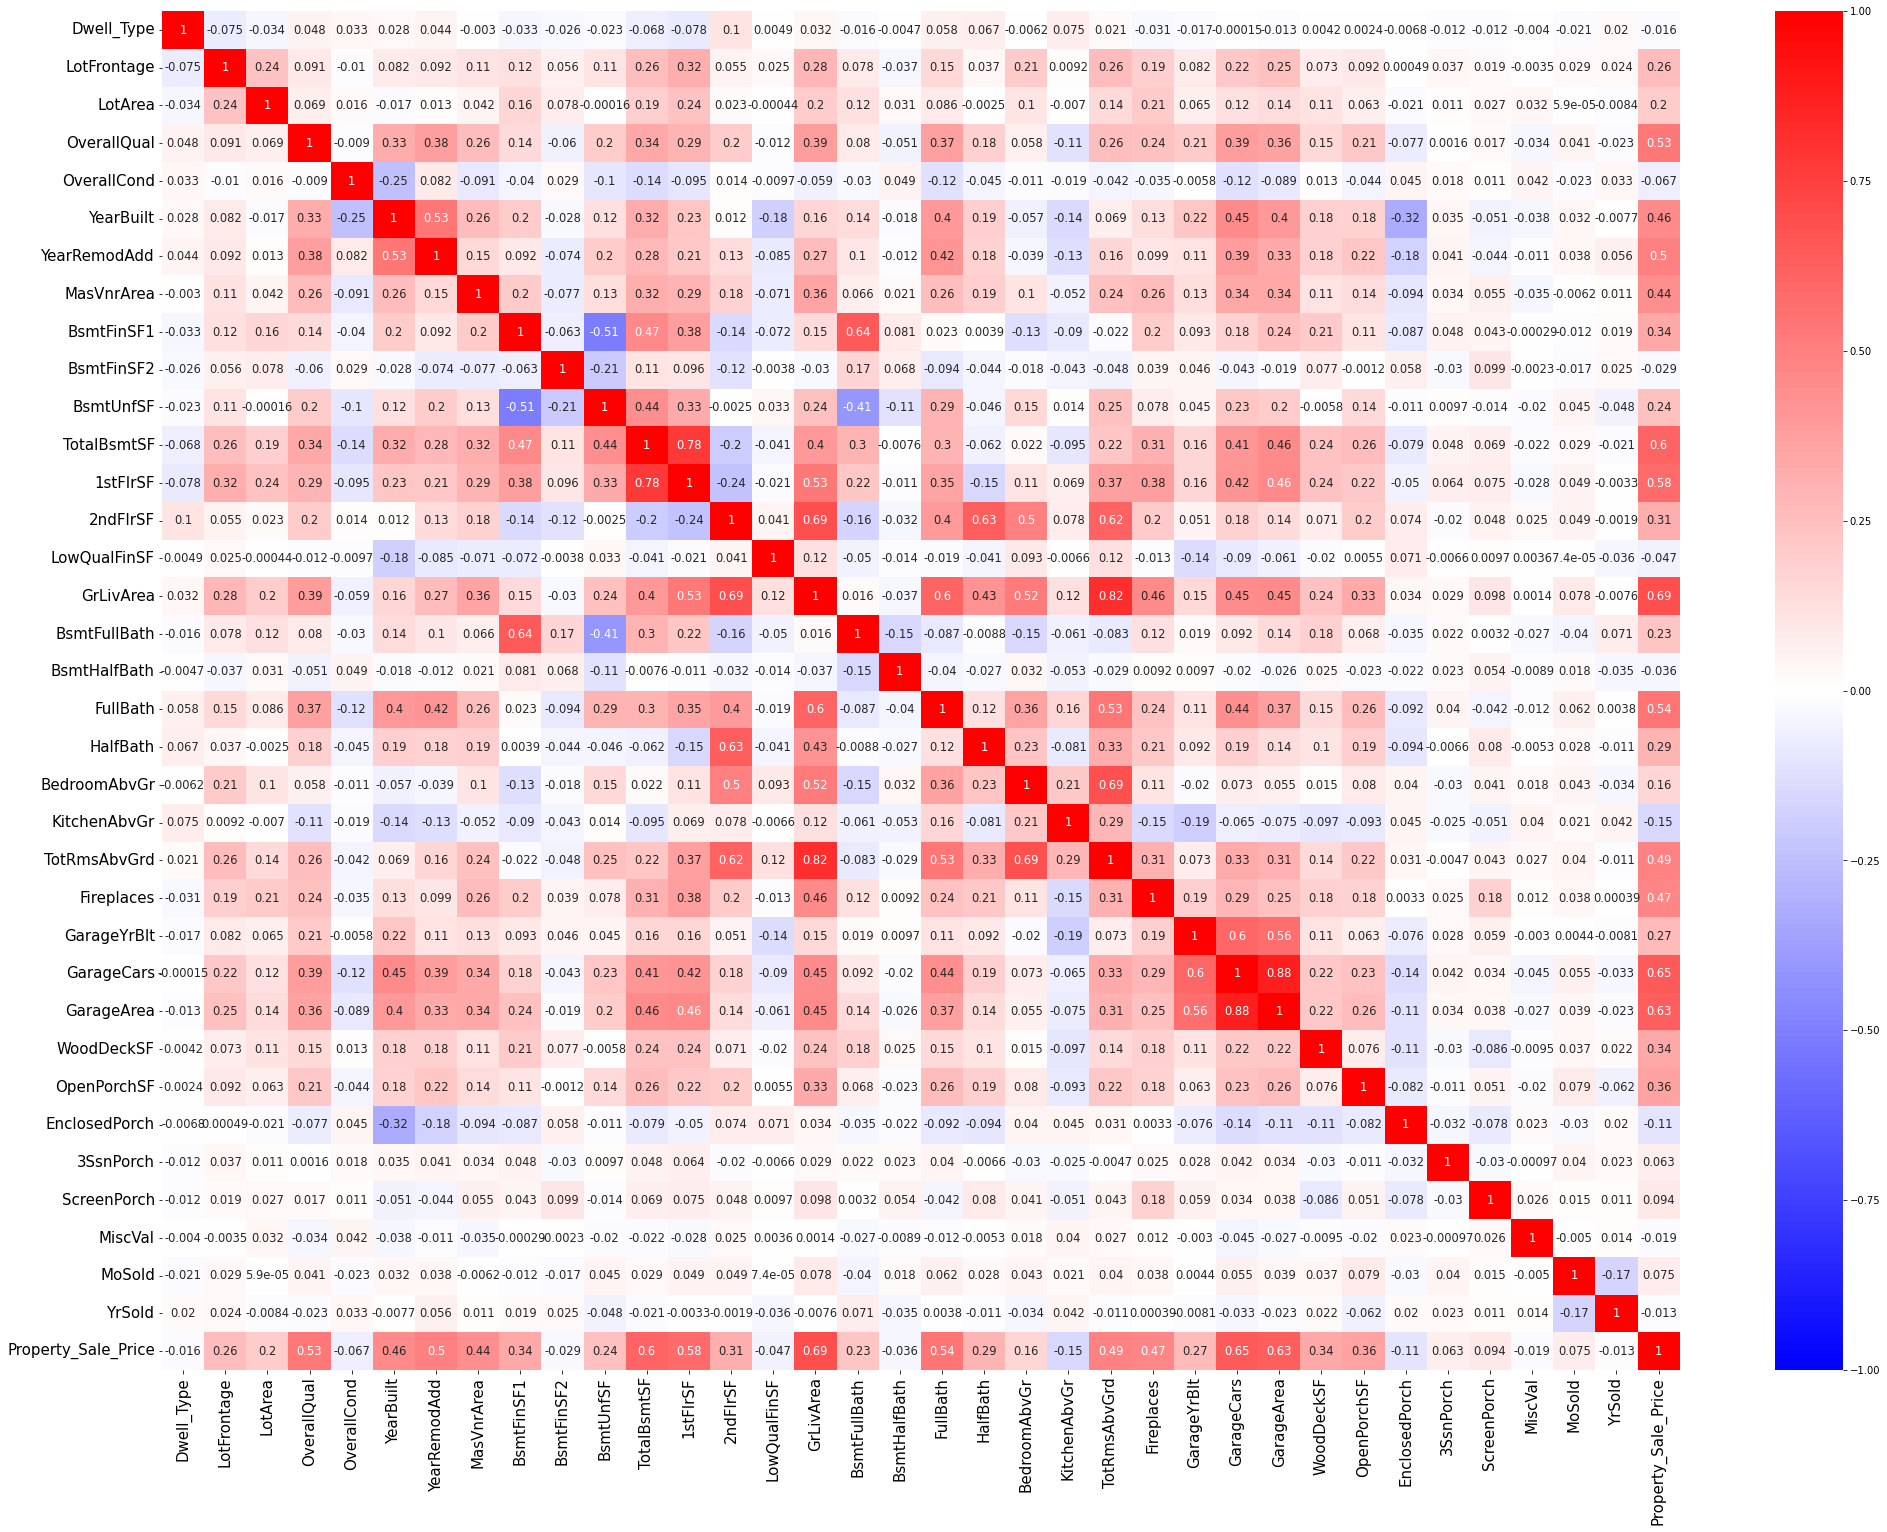

In [47]:
# plot the heatmap for the diagonal correlation matrix 
#A correlation matrix is a  symmetric matrix. plot only the upper triangular entires using a heatmap

# set the plot size 
plt.figure(figsize=(34,25))
# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# annot_kws: sets the font size of the annotation
# annot: prints the correlation values in the chart
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart


sns.heatmap(corr,annot=True,vmax=1.0,vmin=-1,cmap="bwr",annot_kws={"size":11.5})

# set the size of x and y axes labels using "frontsize"
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# display the plot 
plt.show()

# Analyze Relationships Between Taeget and categorical variable 

In [48]:
print(cat)

['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


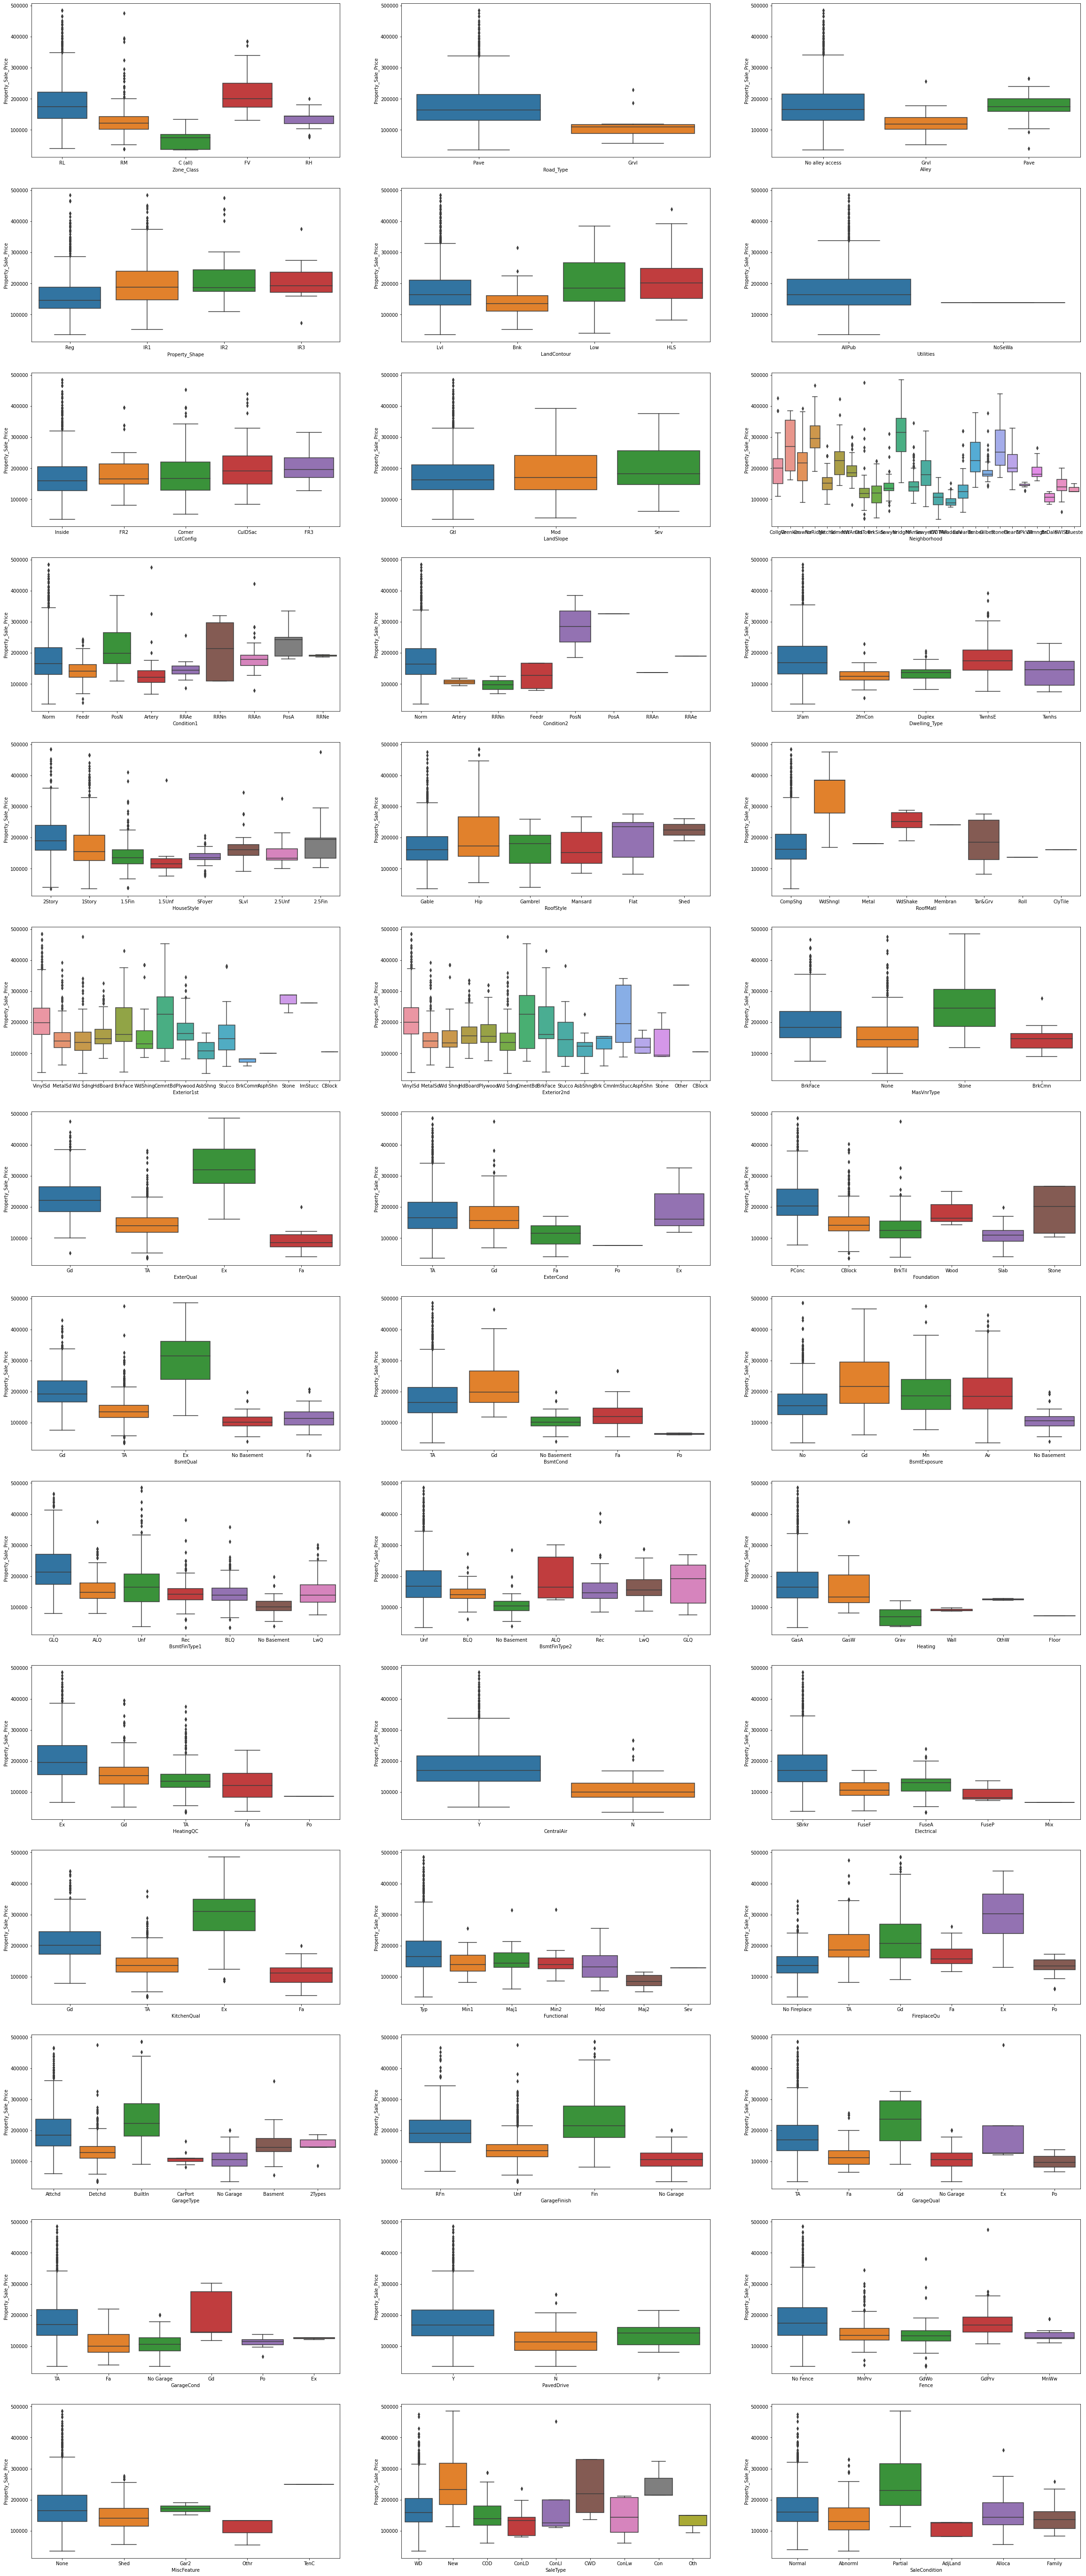

In [49]:
# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize = (40, 100))

# plot the boxplot for each categoric and target variable
for variable, subplot in zip(cat, ax.flatten()):
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = df, ax = subplot)
    
# display the plot
plt.show()

 it can  be seen that most of the categorical variable have an effect on the sale
sale price of the property. the median sale price rise
exponentially with repect to the rating of the overall quality of the material used 

# Data Preparation 

### checking for normality 


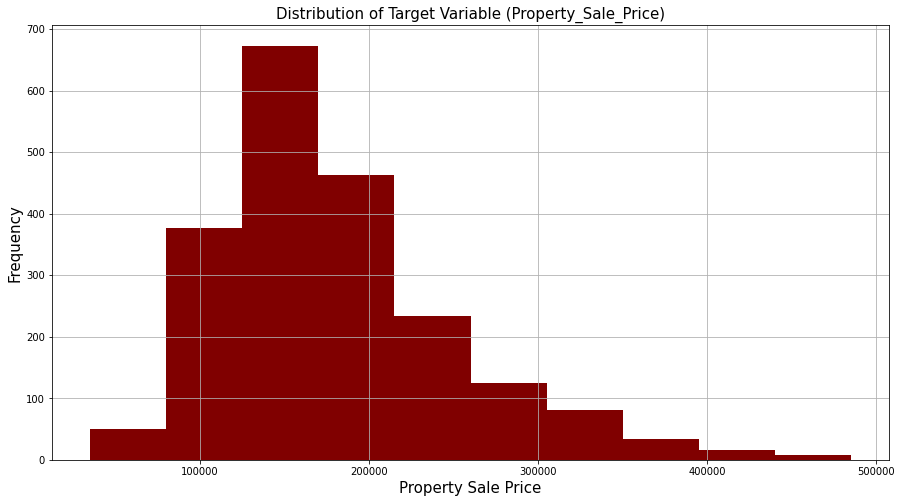

In [50]:
df['Property_Sale_Price'].hist(color="maroon")
# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()


we can see that the variable "property_sale_price" is positively  skewed and thus we can say that it is not normally distributed 

We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights.

Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro-Wilk test is as follows:

#### Ho: The data is normally distributed

#### H1: The data is not normally distributed

In [51]:
# shapiro() returns the the test statistics along with the p-value of the test

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

stat,p = shapiro(df.Property_Sale_Price)

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05


# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')



Statistics=0.926, p-value=0.000
The data is not normally distributed (reject H0)


	
We can see that the p-value is less than 0.05 and thus we reject the null hypothesis. It can be concluded that the data is not normally distributed.

We need to log transform the variable 'Property_Sale_Price' in order to reduce the skewness.

Shaprio Wilk Test does not work if the number of observations are more than 5000. However Shapiro Wilk test is more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used.

## If the data is not normally distributed, use log transformation to reduce the skewness and get a near normally distributed data

In [52]:
# log transformation using np.log()

df["Property_Sale_Price"]=np.log(df["Property_Sale_Price"])

# display the top 5 rows of the data
df.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,12.247694
2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,12.109011
3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,12.317167
4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,11.849398
5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,12.429216


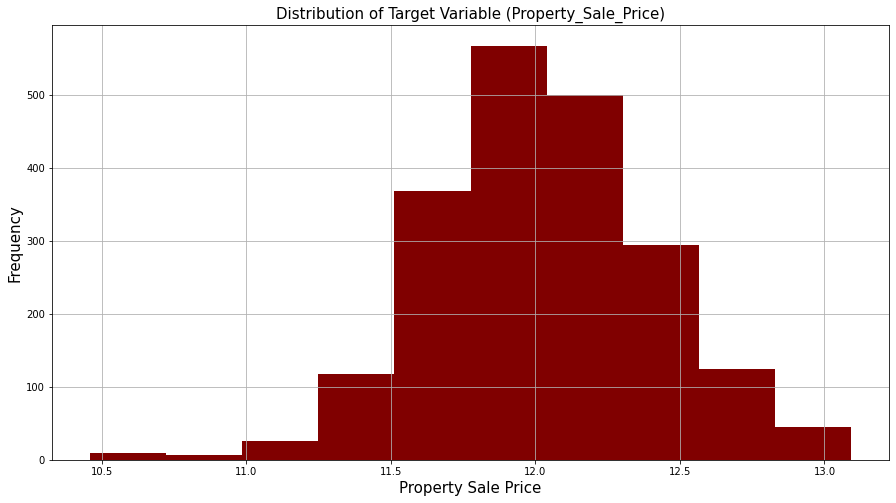

In [53]:
df['Property_Sale_Price'].hist(color="maroon")
# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [54]:
# shapiro() returns the the test statistics along with the p-value of the test

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

stat,p = shapiro(df.Property_Sale_Price)

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05


# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.991, p-value=0.000
The data is not normally distributed (reject H0)


In [55]:
# find the skewness of the variable log_Property_Sale_Price
df["Property_Sale_Price"].skew()

-0.10293032838737998

	
It can be visually seen that the data has near-normal distribution, but Shapiro-Wilk test does not support the claim.
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs.

# converting categorical data to Numerical data

In [56]:
num=[feature for feature in df.columns if df[feature].dtypes!="O"]
print(num)

['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price']


In [57]:
df[num].dtypes

Dwell_Type               int64
LotFrontage            float64
LotArea                  int64
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
MasVnrArea             float64
BsmtFinSF1               int64
BsmtFinSF2               int64
BsmtUnfSF                int64
TotalBsmtSF              int64
1stFlrSF                 int64
2ndFlrSF                 int64
LowQualFinSF             int64
GrLivArea                int64
BsmtFullBath             int64
BsmtHalfBath             int64
FullBath                 int64
HalfBath                 int64
BedroomAbvGr             int64
KitchenAbvGr             int64
TotRmsAbvGrd             int64
Fireplaces               int64
GarageYrBlt            float64
GarageCars               int64
GarageArea               int64
WoodDeckSF               int64
OpenPorchSF              int64
EnclosedPorch            int64
3SsnPorch                int64
ScreenPorch              int64
MiscVal 

In [58]:
print(cat)

['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [59]:
df[cat].dtypes

Zone_Class        object
Road_Type         object
Alley             object
Property_Shape    object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
Dwelling_Type     object
HouseStyle        object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
KitchenQual       object
Functional        object
FireplaceQu       object
GarageType        object
GarageFinish      object
GarageQual        object
GarageCond        object
PavedDrive        object
Fence             object
MiscFeature       object


In [60]:
df.shape

(2059, 78)

## using labela encoded

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in cat:
    df[x]=le.fit_transform(df[x])

In [62]:
df.dtypes

Dwell_Type               int64
Zone_Class               int32
LotFrontage            float64
LotArea                  int64
Road_Type                int32
Alley                    int32
Property_Shape           int32
LandContour              int32
Utilities                int32
LotConfig                int32
LandSlope                int32
Neighborhood             int32
Condition1               int32
Condition2               int32
Dwelling_Type            int32
HouseStyle               int32
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle                int32
RoofMatl                 int32
Exterior1st              int32
Exterior2nd              int32
MasVnrType               int32
MasVnrArea             float64
ExterQual                int32
ExterCond                int32
Foundation               int32
BsmtQual                 int32
BsmtCond                 int32
BsmtExposure             int32
BsmtFinT

# creating X and Y

In [63]:
X=df.iloc[:,:-1]
Y=df["Property_Sale_Price"]

In [64]:
X.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

# split data into train and test data

In [65]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",Y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",Y_test.shape)

The shape of X_train is: (1441, 77)
The shape of X_test is: (618, 77)
The shape of y_train is: (1441,)
The shape of y_test is: (618,)


# linearRegression 

In [66]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
Y_pred=lm.predict(X_test)
#print(Y_pred)

In [68]:
print(lm.score(X_train,Y_train))
print(lm.score(X_test,Y_test))

0.8767352933083791
0.7961045942782937


In [69]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7961045942782937
RMSE: 0.17220426786380091
Adj R-square: 0.7881793311583687


# cross_validation with linearRegression()

In [70]:
from sklearn.model_selection import KFold
classifier = LinearRegression()
kfold_cv=KFold(n_splits=10,random_state=1,shuffle=True)
print(kfold_cv)

KFold(n_splits=10, random_state=1, shuffle=True)


In [71]:
from sklearn.model_selection import cross_val_score
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=kfold_cv)

print(kfold_cv_result)

[0.82421788 0.84963919 0.83370335 0.87485642 0.87802208 0.88680462
 0.69877854 0.87763101 0.89521531 0.85077057]


In [72]:
print(kfold_cv_result.mean())

0.8469638970817657


# Ridge Regression 

In [73]:
from sklearn.linear_model import  Ridge
RD=Ridge()
RD.fit(X_train,Y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
Y_pred=RD.predict(X_test)

In [75]:
 ### Model evaluation_for_Ridge

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7961052069148641
RMSE: 0.17220400915588413
Adj R-square: 0.788179967607668


# Ridge with cross validation

In [76]:
from sklearn.linear_model import Ridge
RD=Ridge(alpha=10)
RD.fit(X_train,Y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [77]:
Y_pred=RD.predict(X_test)

In [78]:
 ### Model evaluation_for_Ridge

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7968882967792904
RMSE: 0.17187300280530307
Adj R-square: 0.7889934955940332


# lassor Regression  with optimal alpha


In [79]:
from sklearn.linear_model import LassoCV
ls=LassoCV(cv=5,random_state=1,max_iter=10000)
ls.fit(X_train,Y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False)

In [80]:
ls.alpha_

0.6651897270391843

In [81]:
### use the best alpha for the model 
from sklearn.linear_model import Lasso
ls1=Lasso(alpha=ls.alpha_)
ls1.fit(X_train,Y_train)

Lasso(alpha=0.6651897270391843, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
Y_prd=ls1.predict(X_test)

In [83]:
 ### Model evaluation_for_Ridge

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7968882967792904
RMSE: 0.17187300280530307
Adj R-square: 0.7889934955940332


# By logistic Regression 


In [84]:
from sklearn.linear_model import LogisticRegression
classifier=LinearRegression()
classifier.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
Y_pred=classifier.predict(X_test)

In [86]:
 ### Model evaluation_for_Ridge

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7961045942782937
RMSE: 0.17220426786380091
Adj R-square: 0.7881793311583687


# BY KNN

In [87]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=23,metric="euclidean")
KNN.fit(X_train,Y_train)

Y_pred=KNN.predict(X_test)

In [88]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6465019820406493
RMSE: 0.22674289231236844
Adj R-square: 0.6327617763955862


### gridSearch for KNN

In [89]:
l=list(range(1,10,))
print(l)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [90]:
KNN=KNeighborsRegressor()
n=range
l=list(range(1,25))
parameter_spec={"metric":["euclidean","manhattan","minkawski"],"n_neighbors":l }

In [91]:
from sklearn.model_selection import GridSearchCV
Grd=GridSearchCV(KNN,parameter_spec,n_jobs=-1,cv=5)
Grd.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkawski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
print('Best parameters found:\n', Grd.best_params_)

Best parameters found:
 {'metric': 'manhattan', 'n_neighbors': 3}


In [93]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=3,metric="manhattan")
KNN.fit(X_train,Y_train)

Y_pred=KNN.predict(X_test)

In [94]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7324235854710051
RMSE: 0.1972713904201237
Adj R-square: 0.7220230887931995


# BY SVM

In [95]:
from sklearn.svm import SVR
svr=SVR(kernel="rbf",C=1,gamma=0.1)
svr.fit(X_train,Y_train)
Y_pred=svr.predict(X_test)

In [96]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.03170160798274391
RMSE: 0.3752708197689952
Adj R-square: -0.005935431989658291


### grid Search for SCR

In [97]:
svr=SVR()

parameter_space = {'kernel': ["linear","rbf","poly","sigmoid"],
    'gamma': [0.1,0.01,0.001],
    'C': [1,5,8,10,20]}

In [98]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svr, parameter_space, n_jobs=-1, cv=5)

In [99]:
#clf.fit(X_train,Y_train)

# BY DECISION_TREE

In [100]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state=1,max_depth=5,min_samples_leaf=5)
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)

In [101]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.7490535848730597
RMSE: 0.19104280612414573
Adj R-square: 0.73929948393173


## with grid search CV

In [109]:
criterion = ["mse", "friedman_mse", "mae"]
max_features=["auto","sqrt","log2"]
max_depth=[2,4,5]
min_samples_split=[2,3]
min_samples_leaf=[1,2,5]

# create the  parameter

parameter={'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(parameter)

{'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2, 5]}


In [110]:
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeRegressor()
Grid=GridSearchCV(estimator=DT,param_grid=parameter,cv=10,n_jobs=-1)

Grid.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 4, 5],
                         'max_feature

In [111]:
print (f'Train Accuracy - : {Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.831
Test Accuracy - : 0.750


In [112]:
Grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [113]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(criterion="mse",random_state=1,max_depth=5,min_samples_leaf=2,max_features="auto")
DT.fit(X_train,Y_train)
Y_pred=DT.predict(X_test)

In [114]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.7572530046998887
RMSE: 0.18789582145583716
Adj R-square: 0.7478176091228526


# BY RANDOM-FOREST_CLASSIFIER

In [115]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)

In [116]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.8996783195263544
RMSE: 0.12079183803867077
Adj R-square: 0.8957788902499936


# By grid serach 

In [117]:
RF=RandomForestRegressor()
#Nnumber of tree in random forest 
n_estimators=[int(x) for x in np.linspace(start=10, stop=100,num=20)]
max_features = ['auto', 'sqrt',"log2"]
# Maximum number of levels in tree
max_depth = [2,4]
#Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]




In [118]:
# create the  parameter
parameter={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(parameter)

{'n_estimators': [10, 14, 19, 24, 28, 33, 38, 43, 47, 52, 57, 62, 66, 71, 76, 81, 85, 90, 95, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [120]:
from sklearn.model_selection import GridSearchCV
Grd=GridSearchCV(estimator=RF,param_grid=parameter,cv=10,n_jobs=-1)
Grd.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, ran...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [121]:
Grd.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 81}

In [122]:
print (f'Train Accuracy - : {Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.831
Test Accuracy - : 0.750


In [123]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=81,random_state=1,bootstrap=True,max_depth=4,
                        max_features="auto",min_samples_leaf=2,min_samples_split=2)
RF.fit(X_train,Y_train)
Y_pred=RF.predict(X_test)

In [124]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.8009135316250702
RMSE: 0.1701614046563647
Adj R-square: 0.7931751883313449


# Extra tress CLassifiers

In [129]:
# predicting using the Extra tress classifiers
from sklearn.ensemble import ExtraTreesRegressor
model_ExtraTree=ExtraTreesRegressor(n_estimators=60,random_state=10,)

# fit the model on the data and Predict  the value 
model_ExtraTree.fit(X_train,Y_train)
Y_pred=model_ExtraTree.predict(X_test)

In [130]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.9147659775525345
RMSE: 0.11133883760897166
Adj R-square: 0.9114529943478628


# ADaBoost_Classifier

In [131]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost=AdaBoostRegressor(base_estimator=
                                  DecisionTreeRegressor(random_state=10),
                                  n_estimators=100,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [132]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.9212612334579362
RMSE: 0.10701249609711554
Adj R-square: 0.9182007160305061


In [133]:
#AdaBoost_Regressor

In [134]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoost=AdaBoostRegressor(base_estimator=
                                  RandomForestRegressor(random_state=10),
                                  n_estimators=100,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [135]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.9202527502370746
RMSE: 0.10769562174813943
Adj R-square: 0.9171530338151942


# XGB Boost

In [136]:
from xgboost import XGBRegressor

In [139]:
model=XGBRegressor(n_estimators=80,random_state=10)
#fit the model on the data and predict the values
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [140]:
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squred:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred: 0.9133912149759341
RMSE: 0.11223315296722997
Adj R-square: 0.9100247957700517


# By PCA -(Principal component analysis)

In [141]:
from sklearn.decomposition import PCA
PCA=PCA(n_components=None)
X_train=PCA.fit_transform(X_train)
X_test=PCA.transform(X_test)
PCA=PCA.explained_variance_ratio_
print(PCA)

[0.97984174 0.00545428 0.00393614 0.00341545 0.00296369 0.0024297
 0.0006586  0.00040017 0.00029915 0.0002216  0.00016625 0.00004934
 0.00004279 0.00004044 0.00003393 0.00001943 0.00000841 0.00000827
 0.00000643 0.000003   0.00000041 0.00000022 0.00000009 0.00000004
 0.00000004 0.00000003 0.00000003 0.00000003 0.00000002 0.00000002
 0.00000002 0.00000002 0.00000002 0.00000002 0.00000002 0.00000001
 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001
 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001 0.00000001
 0.00000001 0.00000001 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [142]:
0.97984174+0.00545428+ 0.00393614+ 0.00341545+ 0.00296369+ 0.0024297

0.998041

In [144]:
from sklearn.decomposition import PCA
PCA=PCA(n_components=0.99)
X_train1=PCA.fit_transform(X_train)
X_test1=PCA.transform(X_test)
PCA=PCA.explained_variance_ratio_
print(PCA)

[0.97984174 0.00545428 0.00393614 0.00341545]


In [145]:
from sklearn.decomposition import PCA
PCA=PCA(n_components=3)
X_train1=PCA.fit_transform(X_train)
X_test1=PCA.transform(X_test)
PCA=PCA.explained_variance_ratio_
print(PCA)

[0.97984174 0.00545428 0.00393614]


In [17]:
from sklearn.svm import  SVC
svc_model=SVC(kernel="rbf",C=1,gamma=0.1)
svc_model.fit(X_train1,Y_train)
Y_pred=svc_model.predict(X_test1)
#print(list(Y_pred))

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[10  0  0]
 [ 0 10  3]
 [ 0  0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.77      0.87        13
           2       0.70      1.00      0.82         7

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Accuracy of the model:  0.9
